# Lending Club Loan Repayment Analysis

#### Research question 
- identify features that are highly correlated to loan default. Develop a model to access applicants and predict whether the loan will be repay in full

Dataset is from [Lending Club Statistics](https://www.lendingclub.com/info/download-data.action/) 2007-2011


## [Data Dictionary](https://github.com/sittingman/capstone/blob/master/lending/data_dict.ipynb)

## Section
- [Data Wrangling](#data-wrangling)
- [Exploratory Analysis](#exploratory)

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows=None

In [2]:
lend = pd.read_csv('data/LoanStats3a.csv', header=1, low_memory=False)

In [3]:
lend.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12020.388061,11312.927179,9675.675936,2239.981444,1.516890,103.213884,14.423558,2613.245652,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4270.794250,49.889875,1.262500
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.855348,9038.619934,7105.750304,2585.057393,7.830064,736.904244,162.335958,4385.066535,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.543917,15.569143,4.142869
min,NaN,500.000000,500.00

In [4]:
# Preview data info strcuture
lend.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,Dec-2018,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.0

In [5]:
# Understand the amount of records. 42K plus record indicate a good sample set
lend.shape

(42538, 144)

In [6]:
lend.issue_d.head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

### Keep only columns that few or no missing data

In [7]:
lend_1 = lend[['issue_d','emp_length', 'loan_amnt', 'home_ownership','annual_inc','verification_status','loan_status','purpose','addr_state','dti','earliest_cr_line','revol_util','total_acc','total_rec_late_fee']]
lend_1.columns

Index(['issue_d', 'emp_length', 'loan_amnt', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'addr_state', 'dti',
       'earliest_cr_line', 'revol_util', 'total_acc', 'total_rec_late_fee'],
      dtype='object')

In [8]:
lend_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 14 columns):
issue_d                42535 non-null object
emp_length             41423 non-null object
loan_amnt              42535 non-null float64
home_ownership         42535 non-null object
annual_inc             42531 non-null float64
verification_status    42535 non-null object
loan_status            42535 non-null object
purpose                42535 non-null object
addr_state             42535 non-null object
dti                    42535 non-null float64
earliest_cr_line       42506 non-null object
revol_util             42445 non-null object
total_acc              42506 non-null float64
total_rec_late_fee     42535 non-null float64
dtypes: float64(5), object(9)
memory usage: 4.5+ MB


<a id="data-wrangling"></a>
## Data Wrangling

#### Rows that don't have data under loan_amnt are purely missing value, and will be dropped

In [9]:
print(lend_1[lend_1.loan_amnt.isnull()])

      issue_d emp_length  loan_amnt home_ownership  annual_inc  \
39786     NaN        NaN        NaN            NaN         NaN   
42536     NaN        NaN        NaN            NaN         NaN   
42537     NaN        NaN        NaN            NaN         NaN   

      verification_status loan_status purpose addr_state  dti  \
39786                 NaN         NaN     NaN        NaN  NaN   
42536                 NaN         NaN     NaN        NaN  NaN   
42537                 NaN         NaN     NaN        NaN  NaN   

      earliest_cr_line revol_util  total_acc  total_rec_late_fee  
39786              NaN        NaN        NaN                 NaN  
42536              NaN        NaN        NaN                 NaN  
42537              NaN        NaN        NaN                 NaN  


In [10]:
# Assign modified dataframe to new variable to avoid Security Type Warining
lend_2 = lend_1.dropna(subset=['loan_amnt'])

In [11]:
lend_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42535 entries, 0 to 42535
Data columns (total 14 columns):
issue_d                42535 non-null object
emp_length             41423 non-null object
loan_amnt              42535 non-null float64
home_ownership         42535 non-null object
annual_inc             42531 non-null float64
verification_status    42535 non-null object
loan_status            42535 non-null object
purpose                42535 non-null object
addr_state             42535 non-null object
dti                    42535 non-null float64
earliest_cr_line       42506 non-null object
revol_util             42445 non-null object
total_acc              42506 non-null float64
total_rec_late_fee     42535 non-null float64
dtypes: float64(5), object(9)
memory usage: 4.9+ MB


#### Identify the category values of loan_status, which will serve as target for this analysis

In [12]:
lend_2.loan_status.value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

#### Convert text value feature into numerics for model training purposes. Create a dictionary to convert loan status into 0 (default) or 1 (Paid)

In [13]:
loan_dict = {'Fully Paid': 1, 'Charged Off': 0, 'Does not meet the credit policy. Status:Fully Paid': 1, 'Does not meet the credit policy. Status:Charged Off': 0 }
loan_dict

{'Fully Paid': 1,
 'Charged Off': 0,
 'Does not meet the credit policy. Status:Fully Paid': 1,
 'Does not meet the credit policy. Status:Charged Off': 0}

#### Create a target column by mapping loan status to dictionary,

In [14]:
#use assign function to avoid security type warining
lend_2 = lend_2.assign(target=lend_2.loan_status.map(loan_dict))

#### Identify potential features columns. 
Run through all features against target through visualization. Goal is to discovers ones that may have positive or negative correlation with % of loans being repay against total in corresponding categories.

Prior to visualization, data need to be cleaned by converting any text values into numerics or categorical value.

#### Loan issues date
- Convert into datetime value

In [15]:
lend_2['loan_start_d'] = pd.to_datetime(lend_2.issue_d, format='%b-%Y')
print (lend_2.loan_start_d.head())

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: loan_start_d, dtype: datetime64[ns]


#### Employment duration
- convert from text to numeric value. 
- clean up na value, assume <1 year if info is not provided (currently unemployment)

In [16]:
lend_2['yr_emp'] = lend_2['emp_length'].str[0:2].replace('< ',0).astype('float')
lend_2['yr_emp'].fillna(0, inplace=True)
print(lend_2.yr_emp.unique())

[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7.]


#### Credit History
- Convert earliest_cr_line into from text to datetime values
- Replace missing values with zero
- Extract year and convert to categorical values to have higher level grouping for this features

In [17]:
lend_2.earliest_cr_line = pd.to_datetime(lend_2.earliest_cr_line, format='%b-%Y')
print(lend_2.earliest_cr_line.head())

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]


In [18]:
lend_2['yr_credit']= (2011-lend_2.earliest_cr_line.dt.year).fillna(0).astype('int')

#### Debt to Income ration (DTI)
- Convert to integer to obtain categorical feature

In [19]:
lend_2['dti'] = lend_2['dti'].astype('int')
lend_2['dti'].head()

0    27
1     1
2     8
3    20
4    17
Name: dti, dtype: int32

#### Credit line % usage
- Convert from string to decimal place, round down to one decimal place to obtain manageable categorical feature

In [20]:
lend_2['revol_util_dec'] = lend_2['revol_util'].str.replace(r'%',r'0').astype('float')/100
lend_2['revol_util_dec'] = lend_2['revol_util_dec'].round(decimals=1)
print (lend_2['revol_util_dec'].head())

0    0.8
1    0.1
2    1.0
3    2.1
4    0.5
Name: revol_util_dec, dtype: float64


#### Total # of credit lines
- Replace missing values with zero

In [21]:
lend_2['credit_account'] = lend_2.total_acc.fillna(0)
print (lend_2.credit_account.unique())
print (lend_2.credit_account.dtype)

[ 9.  4. 10. 37. 38. 12. 11. 13.  3. 23. 34. 29. 28. 42. 14. 22. 21. 17.
  7. 31. 44. 26. 16.  6. 18. 27. 24. 25. 40. 35.  8. 20. 15. 19. 36. 51.
 32. 30. 33. 46.  5. 61. 56. 50. 41. 39. 79. 62. 43. 47. 53. 45. 60. 55.
 52. 58. 54. 57. 49. 63. 48. 59. 77. 87. 75. 72. 64. 67. 78. 76. 74. 66.
 81. 90. 80. 71. 69. 73. 70. 68. 65.  2.  1.  0.]
float64


<a id="exploratory"></a>
## Exploratory Analysis

### General loan pay off rate - ~85%

In [22]:
avg_rate = lend_2['target'].sum()/len(lend_2)
avg_rate

0.8488068649347597

#### Strategy

Plot multiple graphs to access whether a specific attribute in the dataframe will result in positive or negative correlation on the loan pay off rate. 
 - Create groupby dataframe together with the target column. 
 - Pay off rate is calculated by sum of the loan pay off (target column = 1) versus total number of loans in that category.

#### Look at default rate based loan issue dates

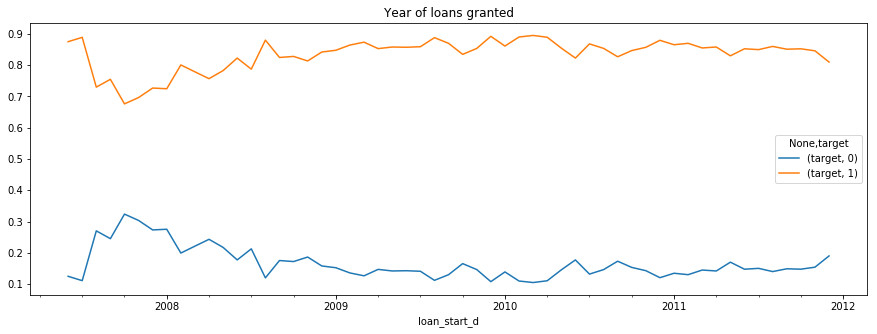

In [23]:
loan_start = lend_2.groupby(['loan_start_d', 'target'])[['target']].count().unstack(level=1)
loan_start = loan_start.apply(lambda r:r/r.sum(), axis=1)
loan_start.plot(kind='line', figsize =(15, 5), title='Year of loans granted');

Loan issued during 2008 and prior had higher default rate, probably due to financial crisis. Given one cannot predict when the next financial crisis is going to happen, data within 2007 and 2008, unfortunately, will be outliers for the dataset and would need to removed from the analysis

In [24]:
lend_post_2008 = lend_2[lend_2['loan_start_d'] >= '2009-1-1']

In [25]:
print (lend_post_2008['target'].sum()/len(lend_post_2008))

0.8538910948683578


To simplify the repetition steps for creating visualization, the following function is created

In [26]:
def visual_data(x):
    y = lend_post_2008.groupby([x,'target'])[['target']].count().unstack(level=1)
    z = y.apply(lambda r: r/r.sum(), axis=1)
    return z

#### The following attributes will be assessed
- Employment length
- Property ownership
- Loan purpose
- Credit line history
- Debt to income ratio (DTI)
- Credit utilization rate

In [27]:
emp_data = visual_data('yr_emp')
ownership = visual_data('home_ownership')
loan_purpose = visual_data('purpose')
yr_credit_g = visual_data('yr_credit')
dti_g = visual_data('dti')
revutil = visual_data('revol_util_dec')
cred_acc = visual_data('credit_account')

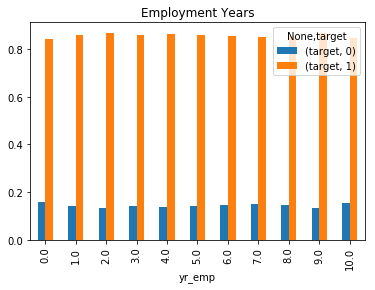

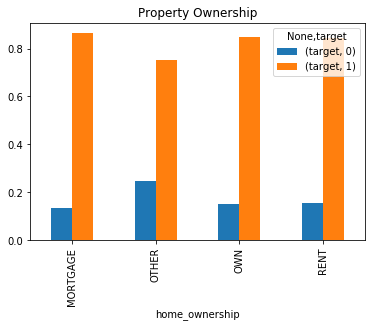

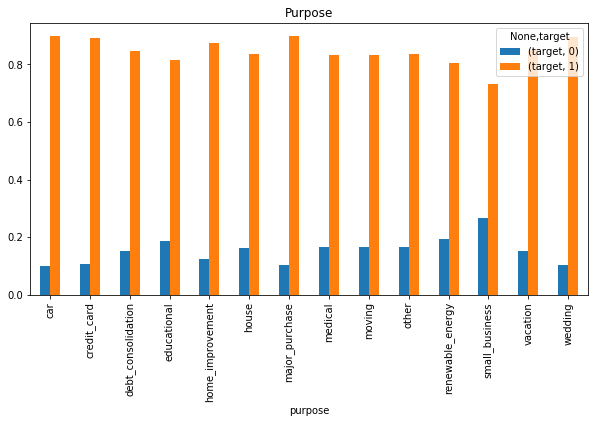

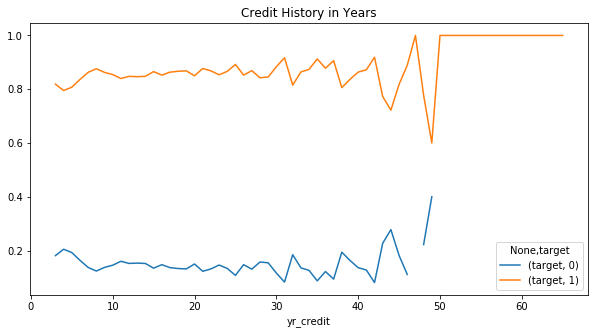

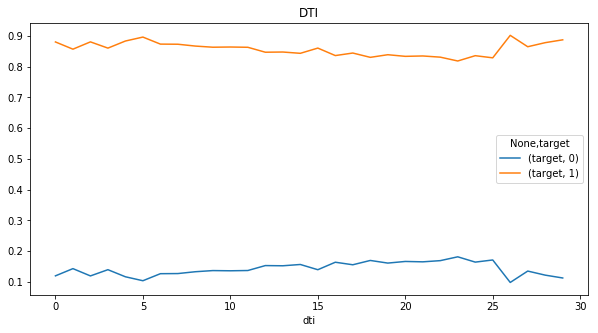

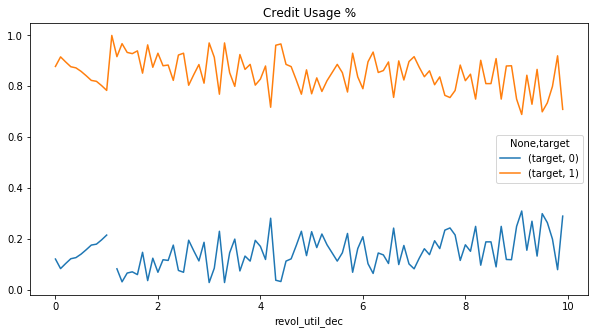

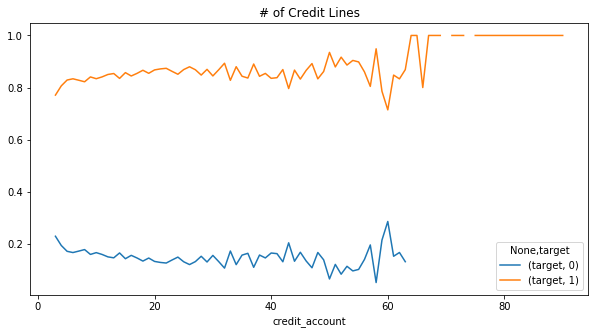

In [28]:
emp_data.plot(kind='bar', title='Employment Years')
ownership.plot(kind='bar', title='Property Ownership')
loan_purpose.plot(kind='bar', figsize=(10,5), title='Purpose')
yr_credit_g.plot(kind='line', figsize=(10,5), title='Credit History in Years')
dti_g.plot(kind='line', figsize=(10,5), title='DTI')
revutil.plot(kind='line', figsize=(10,5), title='Credit Usage %')
cred_acc.plot(kind='line', figsize=(10,5), title='# of Credit Lines');

### Observations
    
 - Employment time does not indicate obvious correlation on loan pay off rate
 - Owning a property or rent does not indicate obvious correlation on loan pay off rate
 - Default rate varies by purpose. Among those, educational and small_business seem to have highest charge off rate, versus wedding has the lowest
 - Charge off rate go up from 0-5yrs, then gradually drop toward 10yrs. Post that the default rate stay roughly the same till 30 yrs plus, and that could be driven by small sample size
 - While not extremely strong correlation, the increase of dti has positive correlation with default rates
 - Credit usage does not show consistent correlation on loan pay off rate
 - Number of credit line is inversely correlated to default rates